# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here 
import json
import pandas as pd

f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [12]:
#Your code here
data.keys()
print('First Level: {}]'.format(data.keys()))

data['meta'].keys()
print('Second Level in "meta": {}]'.format(data['meta'].keys()))

data['data']
print('Second Level in "data": {}]'.format(len(data['data'])))

First Level: dict_keys(['meta', 'data'])]
Second Level in "meta": dict_keys(['view'])]
Second Level in "data": 60266]


## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [29]:
data['meta']['view']['columns']

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

In [45]:
#finds column names
cols = []
for item in data['meta']['view']['columns']:
    cols.append(item['name'])



In [46]:
cols[0]

'sid'

In [50]:
df = pd.DataFrame(data['data'], columns=cols )
pd.set_option('display.max_columns', 500)
display(df)

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,16.9,16.9,*,50 States + DC: US Median,16,18,Overall,Overall,None,None,None,None,"[None, None, None, None, None]",None,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,13,13,None,None,11.9,14.1,Overall,Overall,None,None,None,None,"[None, 32.84057112200048, -86.63186076199969, ...",None,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,18.2,18.2,None,None,16,20.6,Overall,Overall,None,None,None,None,"[None, 64.84507995700051, -147.72205903599973,...",None,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,15.6,15.6,None,None,14.3,16.9,Overall,Overall,None,None,None,None,"[None, 34.865970280000454, -111.76381127699972...",None,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,15,15,None,None,13,17.2,Overall,Overall,None,None,None,None,"[None, 34.74865012400045, -92.27449074299966, ...",None,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60261,519150,1B28C1DD-B25F-457E-86E4-7D1463BE82C3,519150,1527194644,959778,1527194644,959778,None,2016,2016,PR,Puerto Rico,ACS 1-Year Estimates,Disability,Disability among adults aged >= 65 years,None,%,Crude Prevalence,None,None,~,Data not shown because of too few respondents ...,None,None,Race/Ethnicity,"Asian, non-Hispanic",None,None,None,None,"[None, 18.220833, -66.590149, None, False]",None,72,DIS,DIS1_0,CRDPREV,RACE,ASN,None,None,None,None
60262,519704,4FF6ADF8-CC4B-4D94-A5B0-7766346A0D3E,519704,1527194644,959778,1527194644,959778,None,2016,2016,PR,Puerto Rico,ACS 1-Year Estimates,Overarching Conditions,Poverty,None,%,Crude Prevalence,None,None,~,Data not shown because of too few respondents ...,None,None,Race/Ethnicity,"Black, non-Hispanic",None,None,None,None,"[None, 18.220833, -66.590149, None, False]",None,72,OVC,OVC3_1,CRDPREV,RACE,BLK,None,None,None,None
60263,519705,02896705-4A9F-45A2-A84B-923DEA6DC6A2,519705,1527194644,959778,1527194644,959778,None,2016,2016,PR,Puerto Rico,ACS 1-Year Estimates,Overarching Conditions,Poverty,None,%,Crude Prevalence,None,None,~,Data not shown because of too few respondents ...,None,None,Race/Ethnicity,American Indian or Alaska Native,None,None,None,None,"[None, 18.220833, -66.590149, None, False]",None,72,OVC,OVC3_1,CRDPREV,RACE,AIAN,None,None,None,None
60264,519706,4DF2E74C-5043-474B-9739-98B4D8736BDB,519706,1527194644

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [51]:
df['Topic'].value_counts()

Diabetes                                           9895
Chronic Obstructive Pulmonary Disease              6960
Overarching Conditions                             5589
Arthritis                                          5220
Tobacco                                            4730
Asthma                                             4675
Nutrition, Physical Activity, and Weight Status    4188
Alcohol                                            4130
Cardiovascular Disease                             3480
Oral Health                                        3480
Cancer                                             2495
Older Adults                                       1740
Mental Health                                      1195
Immunization                                        870
Chronic Kidney Disease                              870
Disability                                          424
Reproductive Health                                 325
Name: Topic, dtype: int64

In [58]:
df[df['Topic']=='Asthma']['Question'].value_counts(normalize=True)

Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       0.186096
Current asthma prevalence among adults aged >= 18 years                                    0.186096
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    0.186096
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       0.186096
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    0.186096
Asthma prevalence among women aged 18-44 years                                             0.069519
Name: Question, dtype: float64

In [74]:
cols = ['StratificationCategoryID1', 'DataValueTypeID', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'YearStart', 'YearEnd','DataValue', 'DataValueAlt', ]
new_df = df[df['Question']=='Current asthma prevalence among adults aged >= 18 years'][cols]
new_df.sort_values(by='LocationAbbr')

,StratificationCategoryID1,DataValueTypeID,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue,DataValueAlt
9797,RACE,CRDPREV,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None,None
10013,RACE,CRDPREV,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,10.3,10.3
9427,OVERALL,AGEADJPREV,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9,9
9959,RACE,AGEADJPREV,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None,None
9905,RACE,CRDPREV,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None,None
...,...,...,...,...,...,...,...,...,...,...,...
9954,RACE,CRDPREV,WY,Wyoming,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,11.9,11.9
10008,RACE,AGEADJPREV,WY,Wyoming,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,10.6,10.6
10062,RACE,CRDPREV,WY,Wyoming,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None,None
9476,OVERALL,AGEADJPREV,WY,Wyoming,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.6,9.6


In [107]:
final_df = new_df[(new_df['StratificationCategoryID1']=='OVERALL') & (new_df['DataValueTypeID']=='CRDPREV')].sort_values(by='LocationAbbr')
final_df['DataValue'] = final_df['DataValue'].astype(float)
final_df.sort_values(by='DataValue',inplace=True)

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

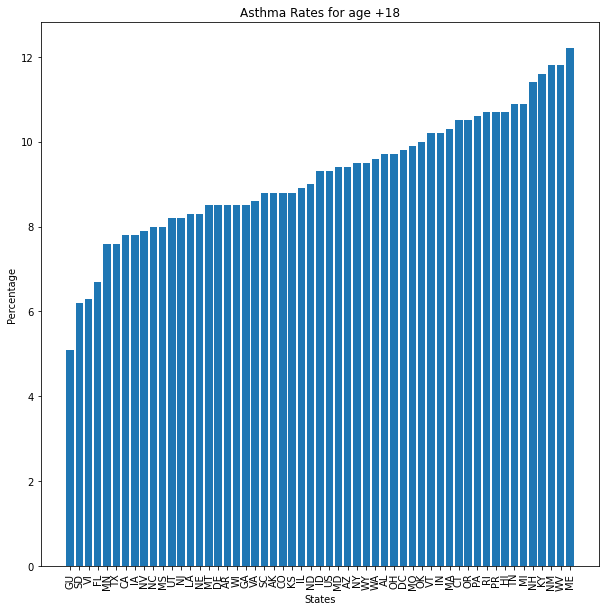

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(final_df['LocationAbbr'], final_df['DataValue'])
ax.set(title='Asthma Rates for age +18', xlabel='States', ylabel='Percentage', )
plt.xticks(rotation=90);


## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!